In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
dataset.isnull().values.any()

False

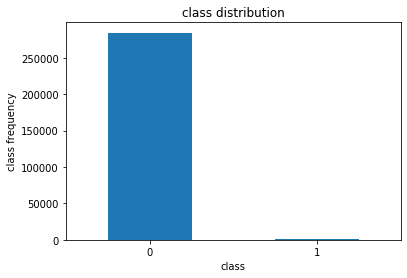

In [7]:
count_class=pd.value_counts(dataset['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title("class distribution")
plt.xlabel('class')
plt.xticks(range(0,2))
plt.ylabel('class frequency')
plt.show()

In [8]:
#get the fraud and normal data
fraud=dataset[dataset['Class']==1]
normal=dataset[dataset['Class']==0]

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

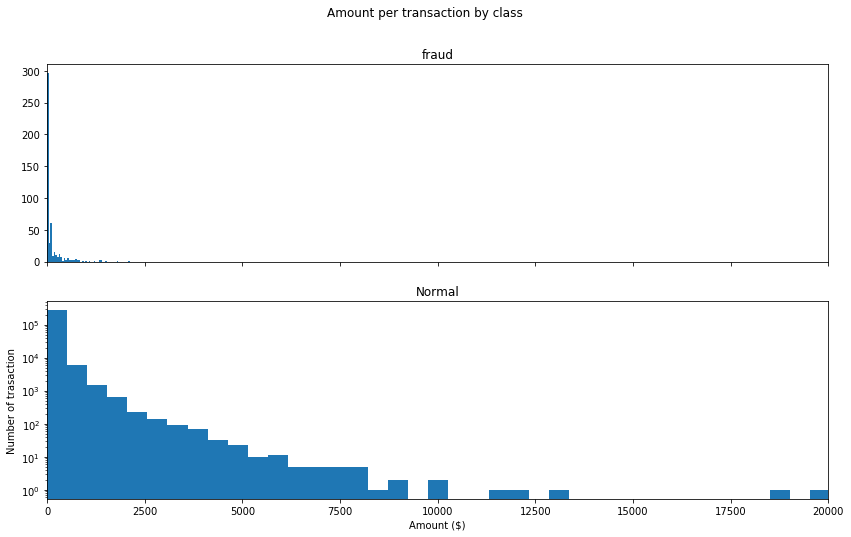

In [10]:
#some more visualization
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transaction by class")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of trasaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

In [11]:
#instead of taking the whole sample we just take some of the sample
data1=dataset.sample(frac=0.1,random_state=2)

In [12]:
data1.shape

(28481, 31)

In [13]:
Fraud=data1[data1['Class']==1]
Valid=data1[data1['Class']==0]

In [15]:
[len(Fraud),len(Valid)]

[39, 28442]

In [16]:
outlier_fraction=len(Fraud)/float(len(Valid))

In [17]:
outlier_fraction

0.0013712115884958864

In [22]:
#create a independent and dependent features
columns=data1.columns.tolist()

#filter the columns to remove the data we dont want
columns=[c for c in columns if c not in ["Class"]]

target="Class"

X=data1[columns]
Y=data1[target]

In [26]:
##Define the outlier detection methods
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=24, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=24)
   
}

In [27]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

e:\python\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
e:\python\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 45
Accuracy Score :
0.9984199992977775
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28442
           1       0.42      0.44      0.43        39

    accuracy                           1.00     28481
   macro avg       0.71      0.72      0.71     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 79
Accuracy Score :
0.9972262209894316
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28442
           1       0.00      0.00      0.00        39

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



e:\python\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


Support Vector Machine: 8711
Accuracy Score :
0.6941469751764334
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     28442
           1       0.00      0.23      0.00        39

    accuracy                           0.69     28481
   macro avg       0.50      0.46      0.41     28481
weighted avg       1.00      0.69      0.82     28481

